# Initial Exploration and Data Manipulation for Zillow
* Single Family Residential (2017)

## <div class="alert alert-block alert-info"> Imports<div>

In [1]:
# My Modules
import wrangle_zillow as wr
import explore_zillow as ex

# Imports
import env
import os

# Numbers
import pandas as pd 
import numpy as np

# Vizzes
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting
from sklearn.model_selection import train_test_split

Load in successful, awaiting commands...


## <div class="alert alert-block alert-info"> Wrangle</div>

Goals Acquire:

* get data
* cache a local copy
* verify it all came in
* look at it
* understand my data
* want to know what which row representations
* understand what each column means


Goals Prepare:
* rename columns
* verify/correct datatypes
* handle your nulls
* visualize our univariate variables
* remove outliers

### <div class="alert alert-block alert-info">acquire<div>

In [2]:
df = wr.get_zillow_261()
df.head()

CSV file found and loaded


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid,parcelid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0,10759547
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0,11193347
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0,11215747
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0,11229347
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0,11324547


In [3]:
df.shape

(2152863, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
 7   propertylandusetypeid         float64
 8   parcelid                      int64  
dtypes: float64(8), int64(1)
memory usage: 164.3 MB


### <div class="alert alert-block alert-info">prepare<div>

In [5]:
# rename columns
df.rename(columns = {'bedroomcnt':'bed', 'bathroomcnt':'bath', 'calculatedfinishedsquarefeet':\
'sqft', 'taxvaluedollarcnt': 'assessed_worth', 'yearbuilt':'year', 'taxamount':'property_taxes',\
'propertylandusetypeid':'use', 'fips':'county'}, inplace = True)

> #### bedroom

In [6]:
# can you have a half bedroom?
df.bed.value_counts(dropna=False)
# guess not, but look at those NaNs..explore here

3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
NaN         11
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bed, dtype: int64

In [7]:
# where are the NaN's and what do they look like?
df[df.bed.isnull()]
# older houses mostly, small... 11/2 million is a drop in the bucket, so DROP these...

,bed,bath,sqft,assessed_worth,year,property_taxes,county,use,parcelid
107763,NaN,NaN,NaN,67366.0,1926.0,780.54,6059.0,261.0,79639557
118612,NaN,NaN,NaN,43992.0,1946.0,541.64,6059.0,261.0,79639558
193993,NaN,NaN,1348.0,840698.0,1952.0,NaN,6059.0,261.0,79639565
1141339,NaN,NaN,200.0,188972.0,NaN,NaN,6037.0,261.0,76914853
1324608,NaN,NaN,990.0,435000.0,1906.0,NaN,6037.0,261.0,76915070
1442975,NaN,NaN,NaN,273196.0,NaN,NaN,6037.0,261.0,76916281
1647346,NaN,NaN,400.0,28347.0,1954.0,NaN,6037.0,261.0,76915500
1701026,NaN,NaN,NaN,407930.0,1926.0,NaN,6037.0,261.0,76916105
1722707,NaN,NaN,NaN,477161.0,NaN,NaN,6037.0,261.0,76914507
1776422,NaN,NaN,NaN,38855.0,NaN,NaN,6037.0,261.0,76915512


In [8]:
# data type makes sense here, keep a float for scalibility
df.bed.dtypes

dtype('float64')

> #### bathroom

In [9]:
# you can have a half bathroom
df.bath.value_counts(dropna=False)
# 11 NaN's, same as bed's...

2.00     943589
3.00     422841
1.00     414324
2.50     142981
4.00      82155
1.50      31211
3.50      28518
5.00      28362
4.50      19506
0.00      13027
6.00      10747
5.50       6217
7.00       4394
8.00       1692
6.50       1333
9.00        713
7.50        384
10.00       325
11.00       146
8.50        110
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
NaN          11
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bath, dtype: int64

In [10]:
# where are the NaN's and what do they look like?
df[df.bath.isnull()]

,bed,bath,sqft,assessed_worth,year,property_taxes,county,use,parcelid
107763,NaN,NaN,NaN,67366.0,1926.0,780.54,6059.0,261.0,79639557
118612,NaN,NaN,NaN,43992.0,1946.0,541.64,6059.0,261.0,79639558
193993,NaN,NaN,1348.0,840698.0,1952.0,NaN,6059.0,261.0,79639565
1141339,NaN,NaN,200.0,188972.0,NaN,NaN,6037.0,261.0,76914853
1324608,NaN,NaN,990.0,435000.0,1906.0,NaN,6037.0,261.0,76915070
1442975,NaN,NaN,NaN,273196.0,NaN,NaN,6037.0,261.0,76916281
1647346,NaN,NaN,400.0,28347.0,1954.0,NaN,6037.0,261.0,76915500
1701026,NaN,NaN,NaN,407930.0,1926.0,NaN,6037.0,261.0,76916105
1722707,NaN,NaN,NaN,477161.0,NaN,NaN,6037.0,261.0,76914507
1776422,NaN,NaN,NaN,38855.0,NaN,NaN,6037.0,261.0,76915512


In [11]:
# do these NaN's match the bed's?
df[(df.bath.isnull()) & (df.bed.isnull())]
# Yes. DROP.

,bed,bath,sqft,assessed_worth,year,property_taxes,county,use,parcelid
107763,NaN,NaN,NaN,67366.0,1926.0,780.54,6059.0,261.0,79639557
118612,NaN,NaN,NaN,43992.0,1946.0,541.64,6059.0,261.0,79639558
193993,NaN,NaN,1348.0,840698.0,1952.0,NaN,6059.0,261.0,79639565
1141339,NaN,NaN,200.0,188972.0,NaN,NaN,6037.0,261.0,76914853
1324608,NaN,NaN,990.0,435000.0,1906.0,NaN,6037.0,261.0,76915070
1442975,NaN,NaN,NaN,273196.0,NaN,NaN,6037.0,261.0,76916281
1647346,NaN,NaN,400.0,28347.0,1954.0,NaN,6037.0,261.0,76915500
1701026,NaN,NaN,NaN,407930.0,1926.0,NaN,6037.0,261.0,76916105
1722707,NaN,NaN,NaN,477161.0,NaN,NaN,6037.0,261.0,76914507
1776422,NaN,NaN,NaN,38855.0,NaN,NaN,6037.0,261.0,76915512


In [12]:
# keep as a float, checks out
df.bath.dtypes

dtype('float64')

* No beds, no baths, I think this is just LAND... verify with sqft but for the prompt - drop

> #### sqft

In [13]:
# look at the data
df.sqft.value_counts(dropna=False)
# 8,484 NaN's.....

NaN        8484
1200.0     5195
1080.0     4389
1120.0     4362
1400.0     3833
           ... 
9940.0        1
56.0          1
14547.0       1
9968.0        1
24920.0       1
Name: sqft, Length: 10581, dtype: int64

In [14]:
# where are the nulls located?
df[df.sqft.isnull()]
# I believe these are miscategorized as use 261 when they are use 291 (residential land, vacant)..DROP

,bed,bath,sqft,assessed_worth,year,property_taxes,county,use,parcelid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0,10759547
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0,11193347
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0,11215747
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0,11229347
5,0.0,0.0,NaN,124.0,NaN,NaN,6037.0,261.0,11457547
...,...,...,...,...,...,...,...,...,...
2152823,0.0,0.0,NaN,2568893.0,NaN,27309.30,6059.0,261.0,13889389
2152844,0.0,0.0,NaN,92679.0,NaN,1090.16,6111.0,261.0,17204623
2152854,0.0,0.0,NaN,1198476.0,NaN,NaN,6037.0,261.0,11477607
2152857,0.0,0.0,NaN,1087111.0,NaN,19313.08,6059.0,261.0,14359297


In [15]:
# checks to keep as a float for measurement purposes
df.sqft.dtype

dtype('float64')

> #### assessed_worth
* is the tax assessment value in dollars

In [16]:
# look at the data
df.assessed_worth.value_counts(dropna=False)
# WOW, NO NULLS! whatever.......

450000.0     821
500000.0     779
400000.0     729
430000.0     690
440000.0     685
            ... 
3713490.0      1
1314828.0      1
1166747.0      1
1289528.0      1
536061.0       1
Name: assessed_worth, Length: 592270, dtype: int64

In [17]:
# let's double check
df[df.assessed_worth.isnull()]
# yep. 493 NaN's. These likely have not been assessed yet...

,bed,bath,sqft,assessed_worth,year,property_taxes,county,use,parcelid
10694,0.0,0.0,NaN,NaN,NaN,NaN,6111.0,261.0,17247903
10779,0.0,0.0,NaN,NaN,NaN,NaN,6111.0,261.0,17196455
26588,3.0,1.0,807.0,NaN,1924.0,NaN,6037.0,261.0,12358588
32251,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,261.0,12167950
32656,2.0,2.0,1650.0,NaN,1987.0,51.86,6111.0,261.0,17190855
...,...,...,...,...,...,...,...,...,...
2131494,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,261.0,11131145
2142029,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,261.0,12884901
2142113,3.0,2.0,1432.0,NaN,1991.0,NaN,6037.0,261.0,11832044
2142169,0.0,0.0,NaN,NaN,NaN,NaN,6037.0,261.0,11817802


In [18]:
# since we are trying to predict home value, it doesn't make sense to include properties
# that haven't been assessed yet. DROP.

In [19]:
# money is float - keep as float
df.assessed_worth.dtypes

dtype('float64')

> #### year

In [20]:
# no nulls again? not likely.
df.year.value_counts(dropna=False)

1955.0    84405
1950.0    71693
1954.0    69163
1953.0    62342
1956.0    61942
          ...  
1823.0        1
1855.0        1
1833.0        1
1840.0        1
1874.0        1
Name: year, Length: 154, dtype: int64

In [21]:
# null/NaN check
df[df.year.isnull()]
# 9,337 rows are NaN's....dropppp

,bed,bath,sqft,assessed_worth,year,property_taxes,county,use,parcelid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0,10759547
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0,11193347
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0,11215747
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0,11229347
5,0.0,0.0,NaN,124.0,NaN,NaN,6037.0,261.0,11457547
...,...,...,...,...,...,...,...,...,...
2152823,0.0,0.0,NaN,2568893.0,NaN,27309.30,6059.0,261.0,13889389
2152844,0.0,0.0,NaN,92679.0,NaN,1090.16,6111.0,261.0,17204623
2152854,0.0,0.0,NaN,1198476.0,NaN,NaN,6037.0,261.0,11477607
2152857,0.0,0.0,NaN,1087111.0,NaN,19313.08,6059.0,261.0,14359297


In [22]:
# data types
df.year.dtypes

dtype('float64')

> #### property_taxes
* property taxes amount in dollars

In [23]:
# looking at the data, NaN's...4,442
df.property_taxes.value_counts(dropna=False)

NaN         4442
345.72       172
344.18        77
343.52        75
285.30        67
            ... 
4200.22        1
5609.30        1
4037.26        1
14932.56       1
13494.52       1
Name: property_taxes, Length: 918839, dtype: int64

In [24]:
# where are they and what do they look like?
df[df.property_taxes.isnull()]

,bed,bath,sqft,assessed_worth,year,property_taxes,county,use,parcelid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0,10759547
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0,11193347
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0,11215747
5,0.0,0.0,NaN,124.0,NaN,NaN,6037.0,261.0,11457547
10,0.0,0.0,NaN,11009.0,NaN,NaN,6037.0,261.0,11818747
...,...,...,...,...,...,...,...,...,...
2149353,0.0,0.0,324.0,15659.0,1946.0,NaN,6037.0,261.0,13015962
2151358,2.0,1.5,1482.0,169038.0,1954.0,NaN,6059.0,261.0,14255978
2152488,3.0,2.0,992.0,104040.0,2001.0,NaN,6037.0,261.0,12210086
2152503,3.0,1.0,1894.0,179732.0,NaN,NaN,6037.0,261.0,11782408


> #### county = fips
* county code identifier
    * 6037 = Los Angeles County
    * 6059 = Orange County
    * 6111 = Ventura County

In [25]:
# look at the data
df.county.value_counts(dropna=False)

6037.0    1431811
6059.0     555077
6111.0     165975
Name: county, dtype: int64

In [26]:
# fips does not need to be a float, change to int
df.county.dtypes

dtype('float64')

In [27]:
df.county = df.county.map({6037:"LA", 6059:"Orange", 6111:"Ventura"})

In [28]:
df.county.value_counts()

LA         1431811
Orange      555077
Ventura     165975
Name: county, dtype: int64

In [29]:
# verify
df.dtypes

bed               float64
bath              float64
sqft              float64
assessed_worth    float64
year              float64
property_taxes    float64
county             object
use               float64
parcelid            int64
dtype: object

> #### use
* 261 = Single Family Residential

In [30]:
# look at the data
df.use.value_counts(dropna=False)

261.0    2152863
Name: use, dtype: int64

In [31]:
# matches shape, nothing weird here
df.shape

(2152863, 9)

In [32]:
# doesn't make sense to be a float
df.use.dtypes

dtype('float64')

In [33]:
# change from float to int
df.use = df.use.astype(int)
# CATEGORICAL!

In [34]:
# verify
df.dtypes

bed               float64
bath              float64
sqft              float64
assessed_worth    float64
year              float64
property_taxes    float64
county             object
use                 int64
parcelid            int64
dtype: object

> #### parcelid
* primary key

In [35]:
# look at the data
df.parcelid.value_counts(dropna=False)

10759547    1
11586173    1
11583340    1
11581347    1
11581247    1
           ..
12884534    1
12884343    1
12882782    1
12882636    1
12385768    1
Name: parcelid, Length: 2152863, dtype: int64

In [36]:
# verify no nulls - checked
df.parcelid.isnull().sum()

0

In [37]:
# dtype
df.parcelid.dtypes
# perfect, leave it

dtype('int64')

In [38]:
# test wrangle_zillow in seperate notebook
# test successful!
# will overwrite previous df

In [39]:
df.dtypes

bed               float64
bath              float64
sqft              float64
assessed_worth    float64
year              float64
property_taxes    float64
county             object
use                 int64
parcelid            int64
dtype: object

## <div class="alert alert-block alert-info"> Explore<div>

Goals:

* drop nulls
    * check proportion of remaining data against original data
* check for duplicates
* identify trends
* make note of related columns
* view potential bin sizes
* to predict the values of single unit properties using the obervations from 2017.

In [40]:
# dropping all nulls to prepare for explore and saving to a clean df
df_clean = df.dropna()

In [41]:
# checking proportion of clean df remaining after dropping nulls
print(f" Percent Original Data Remaining: {round(df_clean.shape[0]/df.shape[0]*100,0)}")

 Percent Original Data Remaining: 99.0


In [42]:
# checking for duplicate parcel ids - none found
df_clean.parcelid.value_counts(dropna=False, sort=True)

11324547    1
11560087    1
11559344    1
11559052    1
11559029    1
           ..
12886245    1
12885823    1
12885739    1
12884846    1
12385768    1
Name: parcelid, Length: 2140235, dtype: int64

> #### univariate exploration

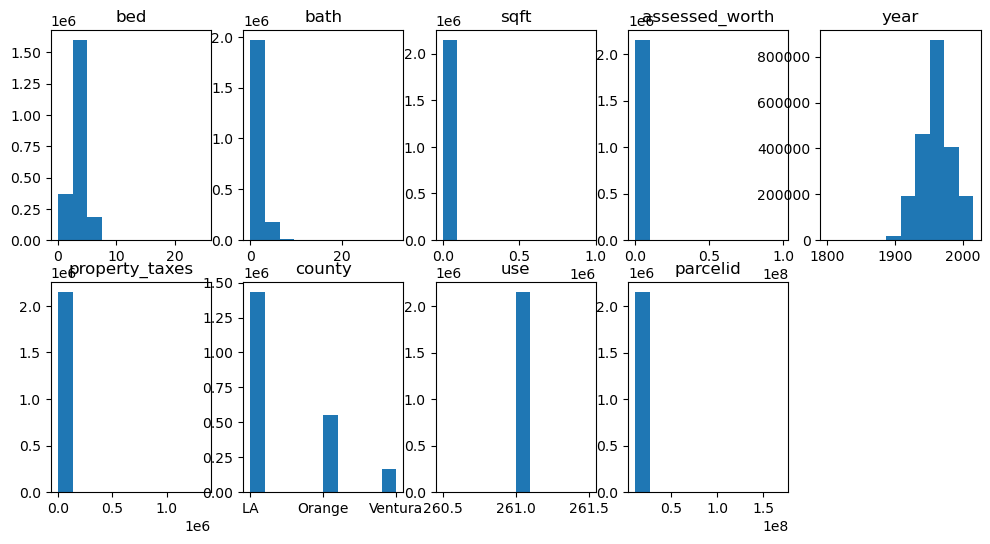

In [43]:
# histogram overview look of not cleaned DF
ex.hist_zillow(df)

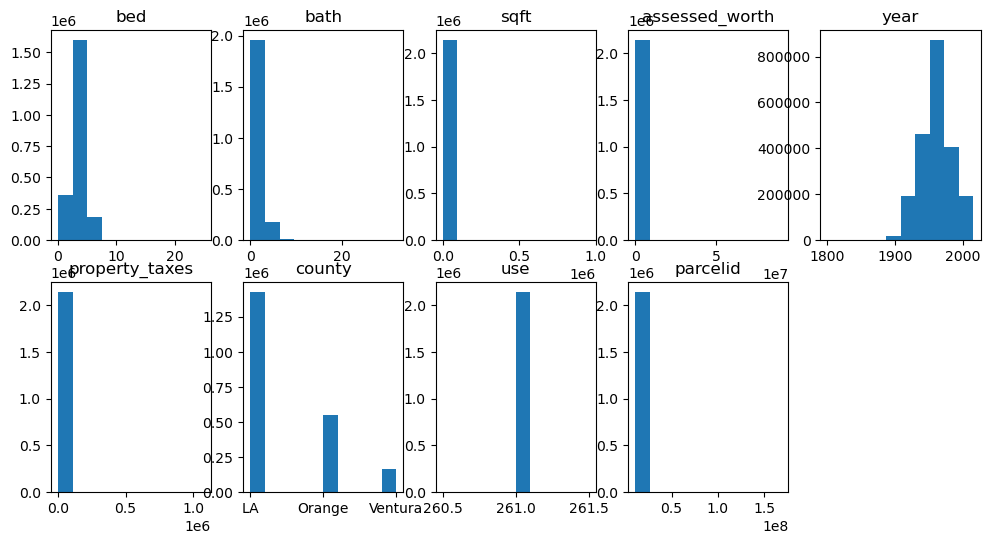

In [44]:
# histogram overview look of cleaned DF
ex.hist_zillow(df_clean)

bed


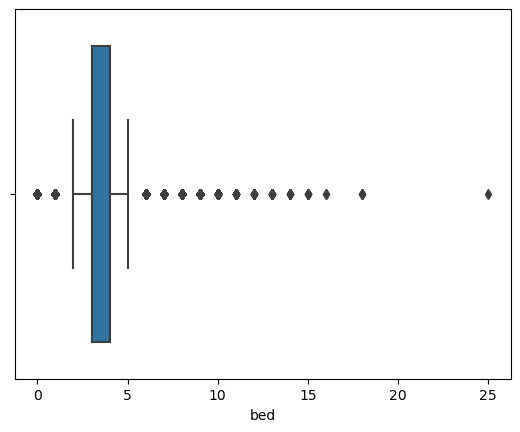

0.0      13187
1.0      23166
2.0     335473
3.0     964298
4.0     634289
5.0     150866
6.0      25166
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
12.0        12
13.0        16
14.0         7
15.0         6
16.0         2
18.0         3
25.0         1
Name: bed, dtype: int64

bath


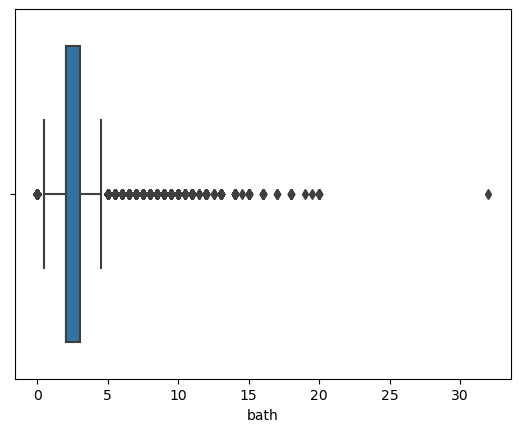

0.00      13027
0.50         16
1.00     414324
1.50      31211
1.75          3
2.00     943589
2.50     142981
3.00     422841
3.50      28518
4.00      82155
4.50      19506
5.00      28362
5.50       6217
6.00      10747
6.50       1333
7.00       4394
7.50        384
8.00       1692
8.50        110
9.00        713
9.50         50
10.00       325
10.50        14
11.00       146
11.50         3
12.00        73
12.50         3
13.00        39
14.00        25
14.50         1
15.00        17
16.00        12
17.00         4
18.00         8
19.00         1
19.50         1
20.00         6
32.00         1
Name: bath, dtype: int64

sqft


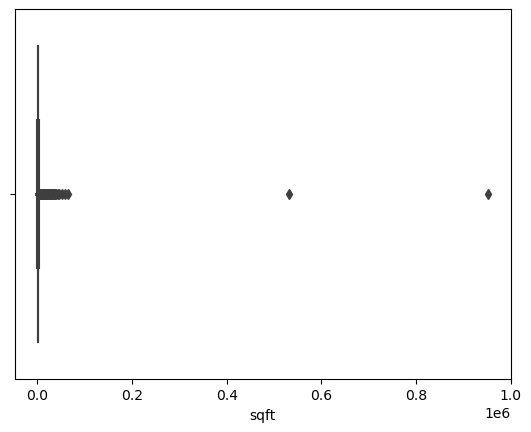

1.0         6
2.0         2
3.0         7
7.0         1
10.0        2
           ..
52503.0     1
59220.0     1
63692.0     1
531118.0    1
952576.0    1
Name: sqft, Length: 10580, dtype: int64

assessed_worth


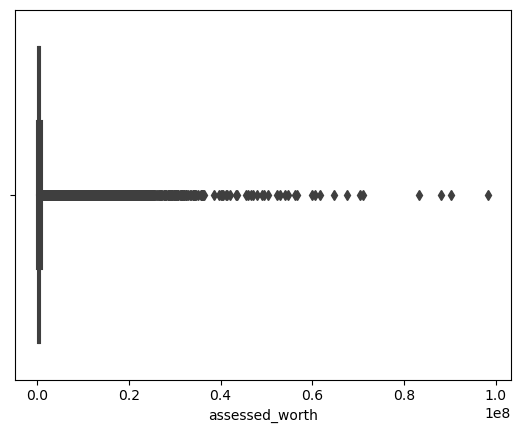

1.0           3
2.0           1
4.0           2
5.0           4
6.0           1
             ..
71067500.0    1
83196095.0    1
88020448.0    1
90188462.0    1
98428909.0    1
Name: assessed_worth, Length: 592269, dtype: int64

year


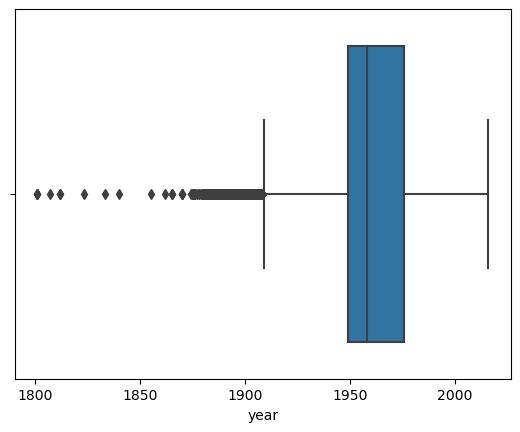

1801.0       3
1807.0       1
1812.0       2
1823.0       1
1833.0       1
          ... 
2012.0    3438
2013.0    4784
2014.0    4714
2015.0    3556
2016.0      98
Name: year, Length: 153, dtype: int64

property_taxes


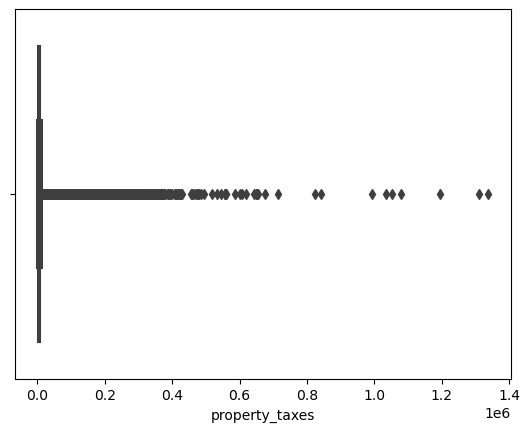

1.85          1
5.78          1
6.00          1
6.18          1
6.34          1
             ..
1052070.50    1
1078101.87    1
1195295.62    1
1310824.04    1
1337755.86    1
Name: property_taxes, Length: 918838, dtype: int64



In [45]:
# function to explore numerical univariate analysis
ex.visual_explore_univariate(df)

> #### outliers

In [46]:
df_clean.sqft.value_counts()

1200.0     5184
1080.0     4376
1120.0     4354
1400.0     3828
1440.0     3684
           ... 
10180.0       1
13169.0       1
9095.0        1
10525.0       1
24920.0       1
Name: sqft, Length: 10557, dtype: int64

In [47]:
# mean sqft of the data
df_clean.sqft.mean()

1863.1939702883094

In [48]:
# cutting out area outliers, keeping every sqft below 25,000
df_clean = df_clean [df_clean.sqft < 25_000]

In [49]:
# verifying proper cut
df_clean.shape

(2140189, 9)

In [50]:
# cutting out value over 95th percentile
df_clean = df_clean [df_clean.assessed_worth < df_clean.assessed_worth.quantile(.95)].copy()

In [51]:
# verifying cut
df_clean.shape

(2033172, 9)

In [52]:
df_clean.insert(0, 'assessed_worth', df_clean.pop('assessed_worth'))

## <div class="alert alert-block alert-info"> Splitting<div>

In [53]:
# splitting into datasets, verifying with size
train, validate, test = wr.split_zillow(df_clean)

Prepared DF: (2033172, 9)
Train: (1219902, 9)
Validate: (406635, 9)
Test: (406635, 9)


In [54]:
# X_train, X_validate, X_test
X_train, y_train, X_validate, y_validate, X_test, y_test = wr.x_y_train_validate_test(train, validate, test, 'assessed_worth')

Verifying number of features and target:
Train: (9, 1)
Validate: (9, 1)
Test: (9, 1)


In [55]:
# dropping columns (actually dropped in function but this is initial exploration)
X_train.drop(columns=['county', 'use','parcelid'], inplace=True)
X_validate.drop(columns=['county', 'use','parcelid'], inplace=True)
X_test.drop(columns=['county', 'use','parcelid'], inplace=True)

## <div class="alert alert-block alert-info"> Scaling<div>

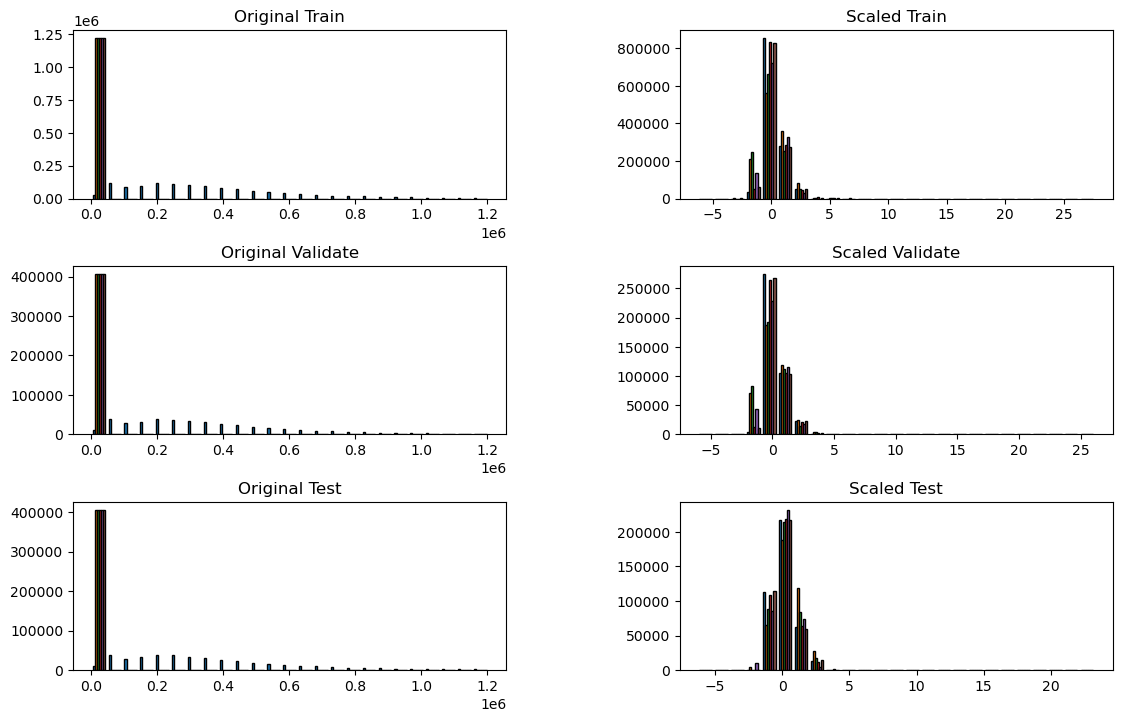

In [56]:
# scaling the data
wr.scale_zillow(X_train, X_validate, X_test)